In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

def get_lists_for_plotting(merged_df, pollutant_column, tax_column, string_column):

    country_names = merged_df['Country'].unique()
    country_list = []
    pollutant_list = []
    tax_list = []
    year_list = []
    stringency_list = []
    
    for country in country_names:
        df = merged_df.loc[merged_df['Country'] == country, :]
        df = df[['Country', 'Year', pollutant_column, tax_column, string_column]]
        df = df.dropna().reset_index()
        df[pollutant_column] = df[pollutant_column].astype(float)
        df[tax_column] = df[tax_column].astype(float)
        df[string_column] = df[string_column].astype(float)
        
        years = list(df['Year'].values)
        pollutant = list(df[pollutant_column].values)
        tax = list(df[tax_column].values)
        stringency = list(df[string_column].values)

        country_list.append(country)
        pollutant_list.append(pollutant)
        tax_list.append(tax)
        year_list.append(years)
        stringency_list.append(stringency)
    
    return country_list, year_list, tax_list, pollutant_list, stringency_list

def plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label):
    for i in range(len(country_list)):
        try:
            x_axis = np.arange(year_list[i][0], (year_list[i][len(year_list[i])-1]) + 1, 1)

            fig, ax1 = plt.subplots()
            fig.subplots_adjust(right=0.75)
            ax2 = ax1.twinx()
            ax3 = ax1.twinx()

            ax3.spines["right"].set_position(("axes", 1.2))
            ax3.spines["right"].set_visible(True)
            make_patch_spines_invisible(ax3)

            plt1 = ax1.plot(year_list[i], tax_list[i], linestyle='--', marker='o', color='b')
            plt2 = ax2.plot(year_list[i], pollutant_list[i], linestyle='--', marker='o', color='g')
            plt3 = ax3.plot(year_list[i], stringency_list[i], linestyle='--', marker='o', color='m')

            plots = plt1+plt2+plt3

            ax1.legend(plots, legend_list, loc='upper center', bbox_to_anchor=(0.5, -0.22), \
                       fancybox=True, shadow=True, ncol=3)

            ax1.set_xticks(x_axis)
            ax1.set_xticklabels(x_axis, rotation=40)
            ax1.set_title(f"{country_list[i]} {title}")
            ax1.set_xlabel(x_label)
            
            ax1.set_ylabel(legend_list[1], color='b')
            ax2.set_ylabel(legend_list[0], color='g')
            ax3.set_ylabel(legend_list[2], color='m')
            
            ax1.tick_params(axis='y', colors='b')
            ax2.tick_params(axis='y', colors='g')
            ax3.tick_params(axis='y', colors='m')
        except IndexError:
            print(f'No data for {country_list[i]}')

In [3]:
data_file = pd.read_csv("../Data/Stacy_Final_Data/Final_Data_Table.csv")

In [4]:
environment_df = pd.DataFrame(data_file)

In [5]:
environment_df.head()

,Unnamed: 0,Country,Year,Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent),Tonnes of CO2 Emiss exc LULUCF,Mean Pop Exp To PM2.5 (µg/m3),Percent Total Tax Rev for Env,Percent Total Gov R&D Budget For Env,GDP Per Capita USD2010PPP,Environmental Policy Stringency,Tonnes of Municipal Waste Generated
0,0,Australia,1990,419843.155,278352.79,No Data,No Data,3.114999,28772.28,0.5,NaN
1,1,Australia,1991,420927.191,279807.363,No Data,No Data,No Data,No Data,0.5,NaN
2,2,Australia,1992,425820.883,284840.06,No Data,No Data,No Data,No Data,0.5,12000.0
3,3,Australia,1993,426128.333,289230.533,No Data,No Data,No Data,No Data,0.75,NaN
4,4,Australia,1994,426074.577,293928.812,No Data,8.437897399,No Data,No Data,0.5,NaN


In [6]:
environment_df = environment_df.replace('No Data', np.nan)
environment_df.head()

,Unnamed: 0,Country,Year,Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent),Tonnes of CO2 Emiss exc LULUCF,Mean Pop Exp To PM2.5 (µg/m3),Percent Total Tax Rev for Env,Percent Total Gov R&D Budget For Env,GDP Per Capita USD2010PPP,Environmental Policy Stringency,Tonnes of Municipal Waste Generated
0,0,Australia,1990,419843.155,278352.79,NaN,NaN,3.114999,28772.28,0.5,NaN
1,1,Australia,1991,420927.191,279807.363,NaN,NaN,NaN,NaN,0.5,NaN
2,2,Australia,1992,425820.883,284840.06,NaN,NaN,NaN,NaN,0.5,12000.0
3,3,Australia,1993,426128.333,289230.533,NaN,NaN,NaN,NaN,0.75,NaN
4,4,Australia,1994,426074.577,293928.812,NaN,8.437897399,NaN,NaN,0.5,NaN


No data for Canada


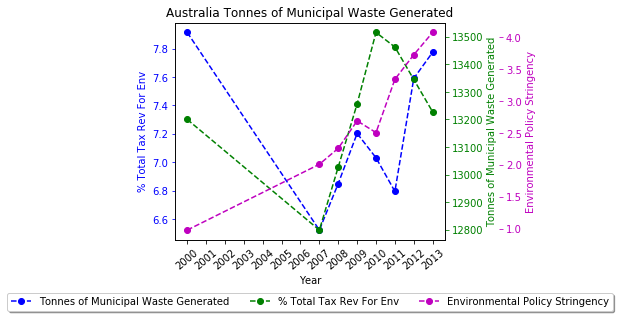

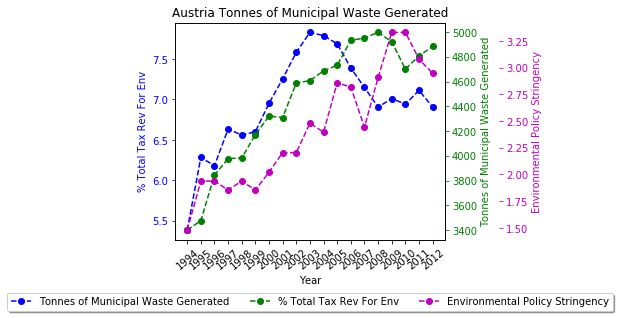

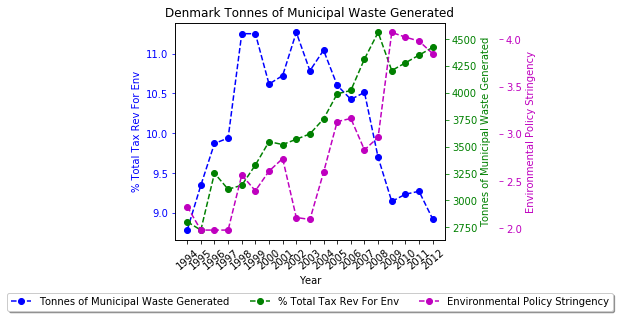

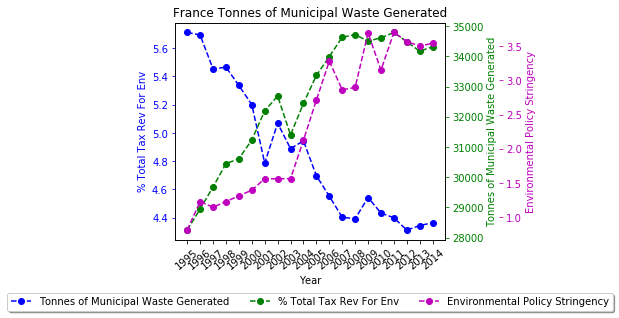

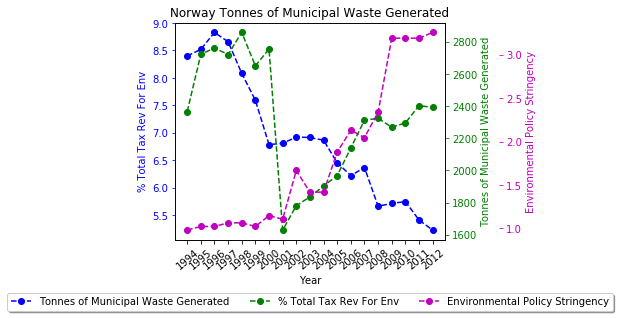

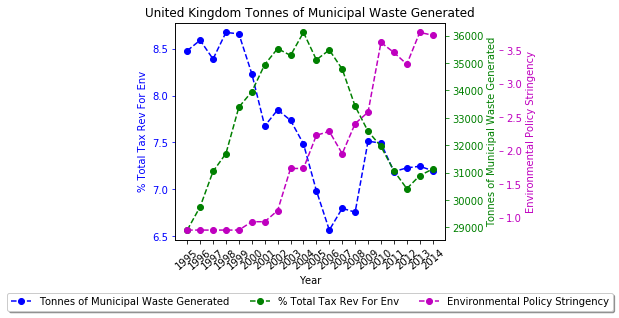

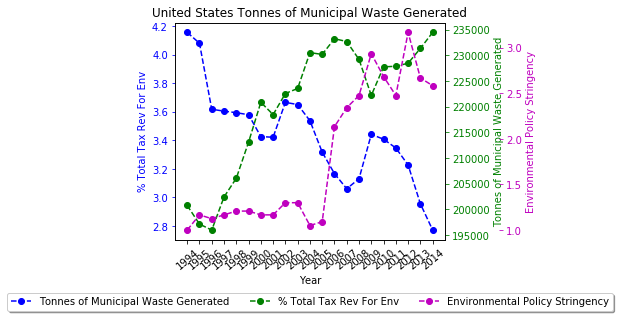

In [7]:
country_list, year_list, tax_list, pollutant_list, stringency_list = \
get_lists_for_plotting(environment_df, 'Tonnes of Municipal Waste Generated', 'Percent Total Tax Rev for Env', 'Environmental Policy Stringency')

legend_list = ['Tonnes of Municipal Waste Generated', '% Total Tax Rev For Env', 'Environmental Policy Stringency']
title = 'Tonnes of Municipal Waste Generated'
x_label = 'Year'

plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label)

In [8]:
environment_df.head()

,Unnamed: 0,Country,Year,Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent),Tonnes of CO2 Emiss exc LULUCF,Mean Pop Exp To PM2.5 (µg/m3),Percent Total Tax Rev for Env,Percent Total Gov R&D Budget For Env,GDP Per Capita USD2010PPP,Environmental Policy Stringency,Tonnes of Municipal Waste Generated
0,0,Australia,1990,419843.155,278352.79,NaN,NaN,3.114999,28772.28,0.5,NaN
1,1,Australia,1991,420927.191,279807.363,NaN,NaN,NaN,NaN,0.5,NaN
2,2,Australia,1992,425820.883,284840.06,NaN,NaN,NaN,NaN,0.5,12000.0
3,3,Australia,1993,426128.333,289230.533,NaN,NaN,NaN,NaN,0.75,NaN
4,4,Australia,1994,426074.577,293928.812,NaN,8.437897399,NaN,NaN,0.5,NaN


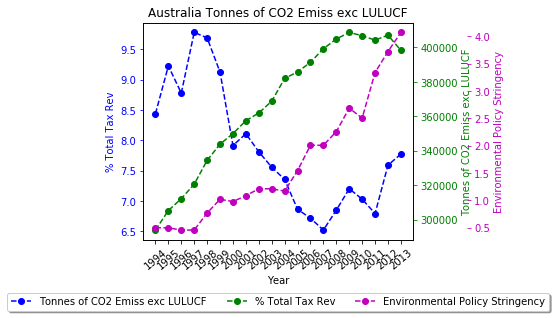

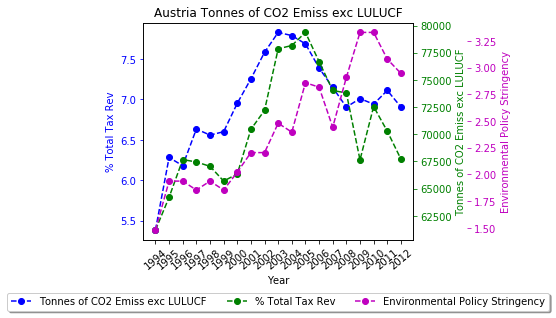

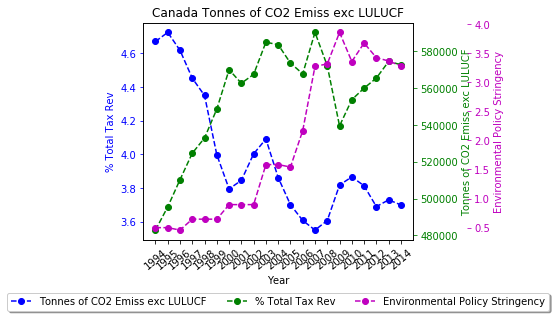

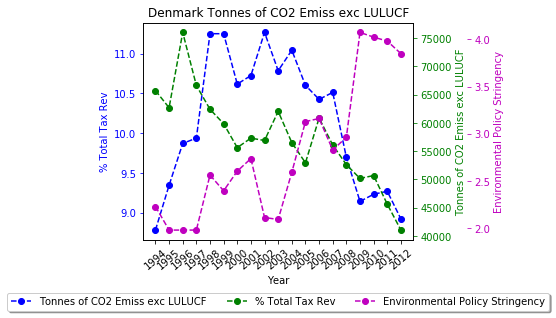

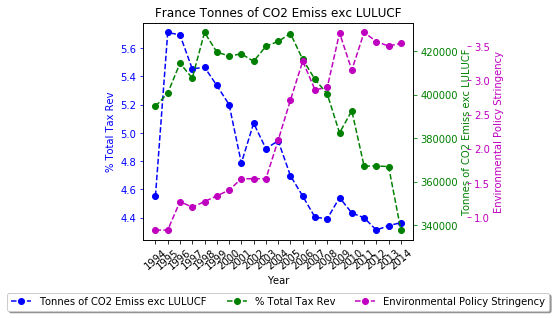

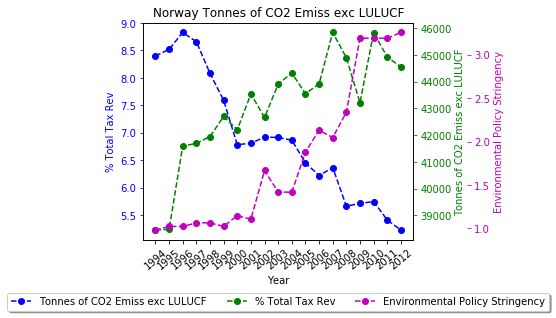

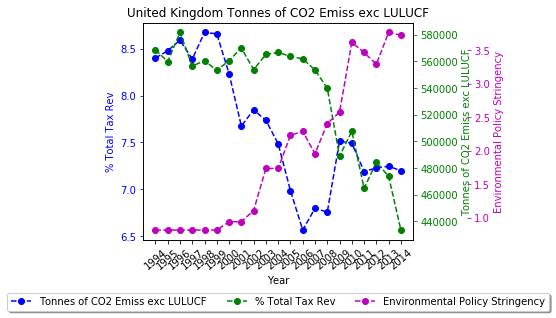

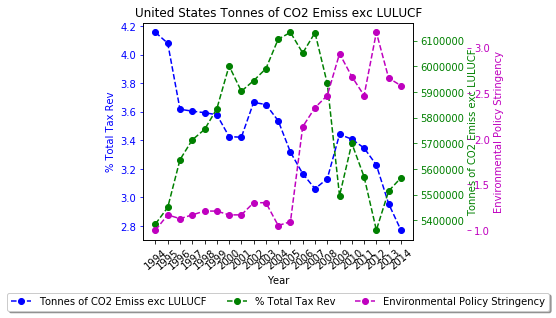

In [9]:
country_list, year_list, tax_list, pollutant_list, stringency_list = \
get_lists_for_plotting(environment_df, 'Tonnes of CO2 Emiss exc LULUCF', 'Percent Total Tax Rev for Env', \
                       'Environmental Policy Stringency')

legend_list = ['Tonnes of CO2 Emiss exc LULUCF', '% Total Tax Rev', 'Environmental Policy Stringency']
title = 'Tonnes of CO2 Emiss exc LULUCF'
x_label = 'Year'

plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label)

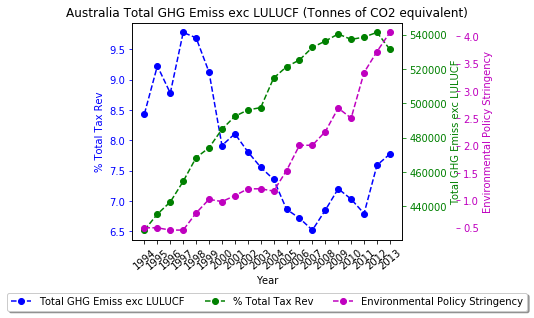

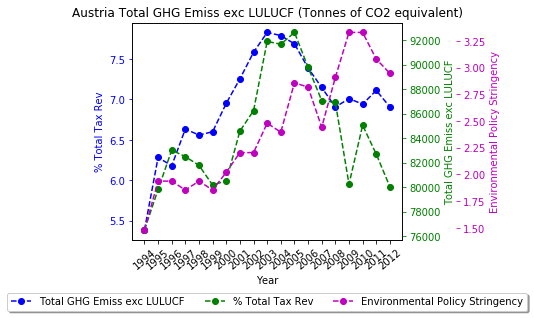

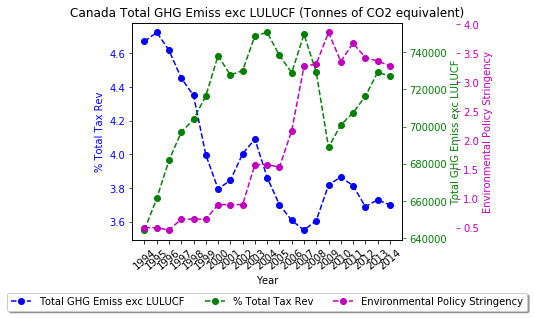

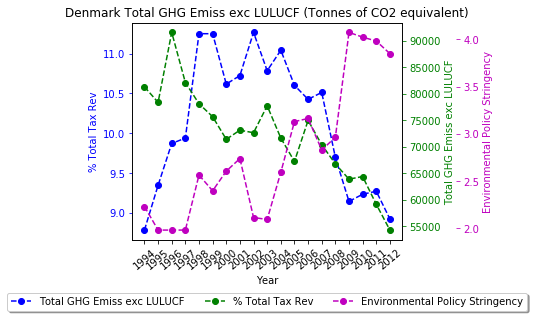

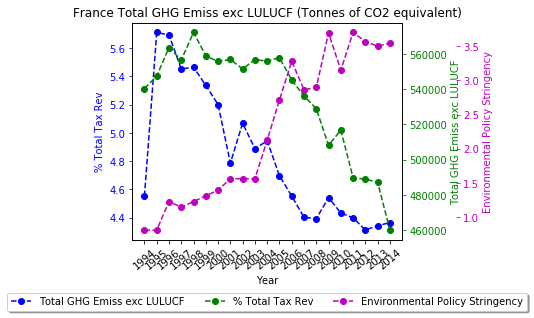

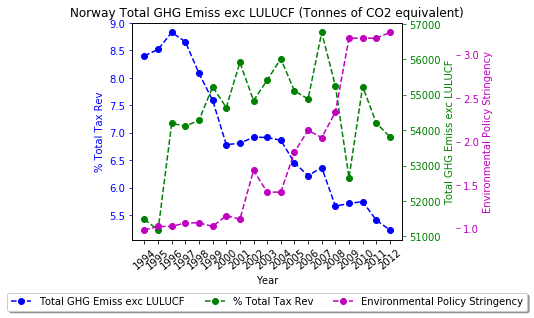

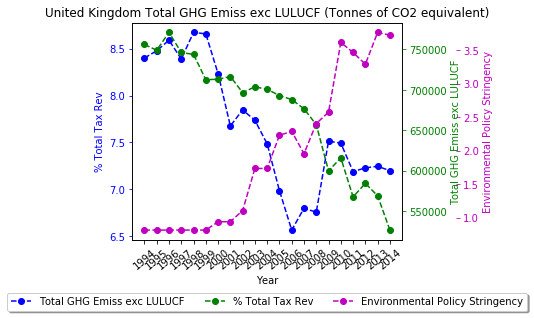

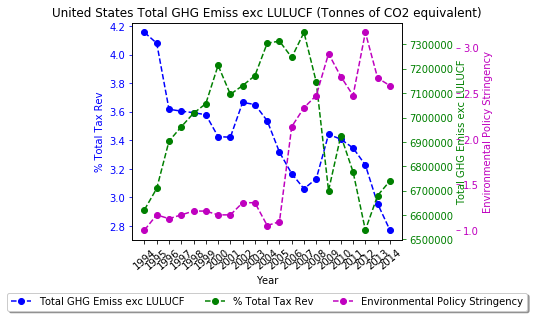

In [10]:
country_list, year_list, tax_list, pollutant_list, stringency_list = \
get_lists_for_plotting(environment_df, 'Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent)', 'Percent Total Tax Rev for Env', \
                       'Environmental Policy Stringency')

legend_list = ['Total GHG Emiss exc LULUCF', '% Total Tax Rev', 'Environmental Policy Stringency']
title = 'Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent)'
x_label = 'Year'

plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label)

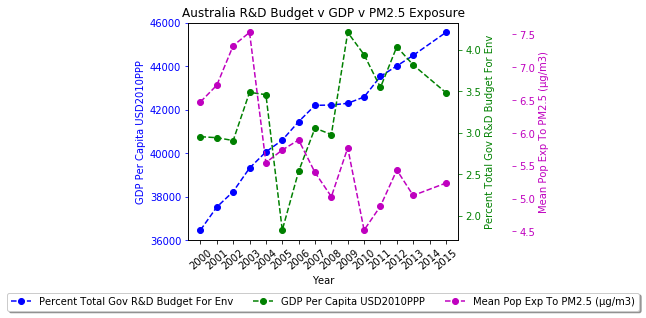

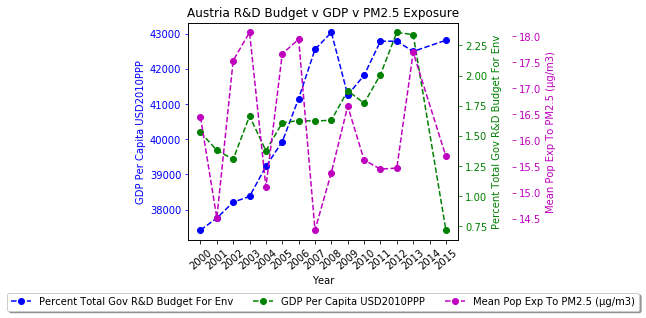

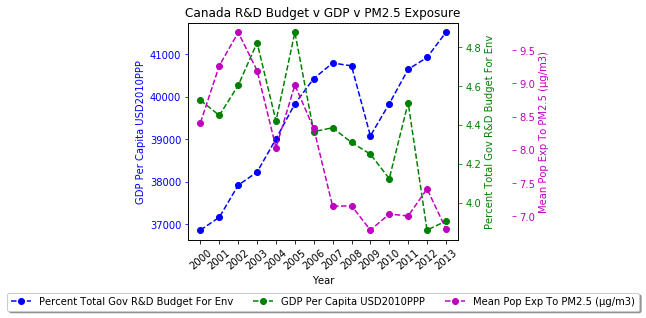

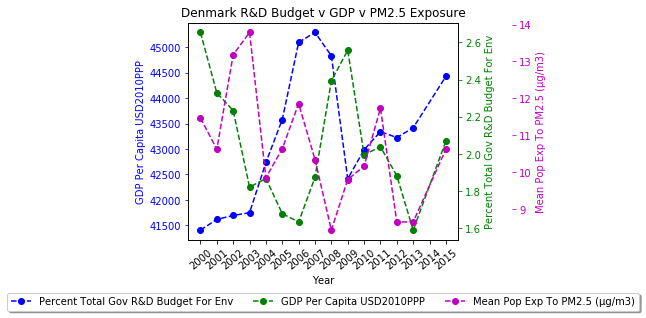

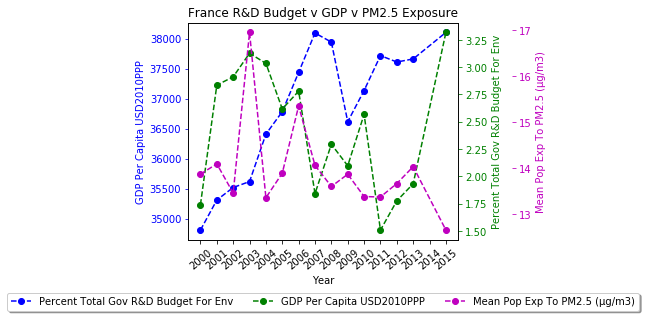

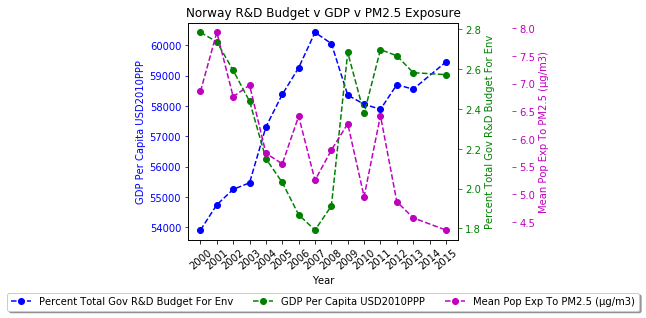

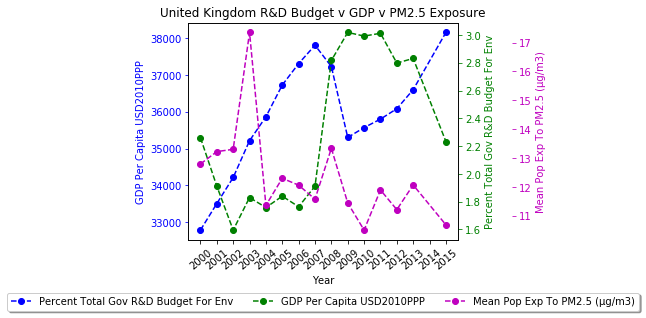

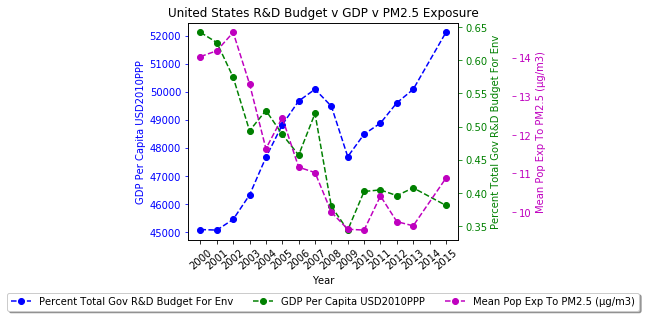

In [11]:
country_list, year_list, tax_list, pollutant_list, stringency_list = \
get_lists_for_plotting(environment_df, 'Percent Total Gov R&D Budget For Env', 'GDP Per Capita USD2010PPP', \
                       'Mean Pop Exp To PM2.5 (µg/m3)')
legend_list = ['Percent Total Gov R&D Budget For Env', 'GDP Per Capita USD2010PPP', 'Mean Pop Exp To PM2.5 (µg/m3)']
title = 'R&D Budget v GDP v PM2.5 Exposure'
x_label = 'Year'

plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label)